University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from tueplots import bundles
from tueplots.constants.color import rgb

## Import data

In [33]:
df_dict = {}
folder_path = '../dat/delay'
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        

        key = filename.split('_')[1].replace(".json", "")

        key = key.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')

        df = pd.read_json(file_path, orient='index')
        df.index = df.index.str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue')
        #print(key)
        df_dict[key] = df

print(df_dict['Berlin Hbf'])

                                                        switch time  \
Kiel Hbf          [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...   
Mainz Hbf         [50.0, 50.0, 50.0, 50.0, 46.0, 46.0, 50.0, 50....   
Muenchen Hbf      [1.0, 1.0, 28.0, 1.0, 1.0, 28.0, 1.0, 1.0, 28....   
Hannover Hbf      [59.0, 22.0, 59.0, 22.0, 22.0, 59.0, 59.0, 22....   
Duisburg Hbf      [46.0, 13.0, 46.0, 13.0, 17.0, 17.0, 46.0, 13....   
Saarbruecken Hbf  [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 48.0, 48....   
Stuttgart Hbf     [28.0, 28.0, 28.0, 54.0, 54.0, 28.0, 28.0, 28....   
Karlsruhe Hbf     [58.0, 58.0, 58.0, 58.0, 50.0, 50.0, 58.0, 58....   
Koeln Hbf         [34.0, 34.0, 46.0, 46.0, 46.0, 46.0, 46.0, 54....   
Nuernberg Hbf     [30.0, 1.0, 30.0, 1.0, 30.0, 1.0, 1.0, 30.0, 1...   
Bremen Hbf        [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 48.0, 48.0...   
Hamburg Hbf       [59.0, 22.0, 59.0, 22.0, 22.0, 59.0, 59.0, 22....   
Essen Hbf         [46.0, 13.0, 46.0, 13.0, 17.0, 17.0, 46.0, 13....   
Wiesba

In [34]:
cities = list(df_dict.keys())
cities.sort()
cities

['Berlin Hbf',
 'Bremen Hbf',
 'Dortmund Hbf',
 'Dresden Hbf',
 'Duesseldorf Hbf',
 'Duisburg Hbf',
 'Erfurt Hbf',
 'Essen Hbf',
 'Hamburg Hbf',
 'Hannover Hbf',
 'Karlsruhe Hbf',
 'Kiel Hbf',
 'Koeln Hbf',
 'Leipzig Hbf',
 'Magdeburg Hbf',
 'Mainz Hbf',
 'Muenchen Hbf',
 'Nuernberg Hbf',
 'Potsdam Hbf',
 'Saarbruecken Hbf',
 'Schwerin Hbf',
 'Stuttgart Hbf',
 'Wiesbaden Hbf']

In [35]:
df_dict['Hamburg Hbf'].head(2)

,switch time,date,delay,reachable
Leipzig Hbf,"[21.0, 21.0, 21.0, 21.0, 47.0, 14.0, 14.0, 14....","[2023-06-12 09:10:00, 2023-10-09 09:10:00, 202...","[0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 2, 0, 32, 1...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, ..."
Mainz Hbf,"[58.0, 1.0, 58.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0...","[2023-10-03 14:18:00, 2023-04-02 22:18:00, 202...","[18, 61, 7, 60.0, 60.0, 13, 0, 0, 0, 1, 60.0, ...","[3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, ..."


## Mean Delay for each switch time

In [36]:
switch_times_array = list(range(1,61,1))
empty = pd.DataFrame(columns=['switch_times', 'mean_delay', 'reachable1', 'reachable2', 'reachable3'])
empty.switch_times = switch_times_array
empty['mean_delay'] = [[] for _ in range(60)]
empty.loc[:, ['reachable1', 'reachable2', 'reachable3']] = 0


#for column in ['mean_delay', 'reachable1', 'reachable2', 'reachable3']: # fill cells with empty lists such that later can fill with numbers
#    empty[column] = [np.array([]) for _ in range(60)]
#display(empty.head(2))

# -------------------

delay_matrix = [[] for _ in range(60)]

# data processing
for key, df in df_dict.items():
    
    #display(df.head(2))
    for irow, row in df.iterrows():
        
        #print(row)

        for i, minute in enumerate(row['switch time']):
            
    
            delay = row['delay'][i]
            #print(empty.loc[minute-1, 'mean_delay'])
            #print(type(empty.loc[minute-1, 'mean_delay']))


            #empty.loc[minute-1, 'mean_delay'].append(delay)
            delay_matrix[int(minute-1)].append(delay)

            #print(empty.loc[minute-1, 'mean_delay'])
            

            # Fill the reachable columns
            case = row['reachable'][i]
            if case == 1:
                empty.loc[minute-1, 'reachable1'] += 1
            elif case == 2:
                empty.loc[minute-1, 'reachable2'] += 1
            elif case == 3:
                empty.loc[minute-1, 'reachable3'] += 1
            
            #display(empty)
            #break
   
        #break

means = []
medians = []
for minute in delay_matrix:
    means.append(np.mean(minute).round(2))
    medians.append(np.median(minute).round(2))

#print(means)
empty['mean_delay'] = means
empty['median_delay'] = medians
df_mean_delays = empty

## Mean delay at destination

In [99]:
empty = pd.DataFrame(columns=cities, index=cities)

# Data processing

df_mean = empty.copy()
df_median = empty.copy()

for key, df in df_dict.items():
    #print(key)
    #display(df.head(2))
    df["meanDelay"] =df["delay"].apply(np.mean)
    df["medianDelay"] = df["delay"].apply(np.median)
    array_mean = df["delay"].apply(np.nanmean).round()
    array_median = df["delay"].apply(np.median)
    #print(key)
    #print(key, array_mean)
    df_mean.loc[key] = array_mean
    df_median.loc[key] = array_median
    

    #break

df_mean = df_mean.fillna(np.nan)

/Users/Nadja/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Nadja/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/Nadja/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1814: RuntimeWarning: Mean of empty slice
  return lib.map_infer(values, mapper, convert=convert)


In [100]:
df_mean

,Berlin Hbf,Bremen Hbf,Dortmund Hbf,Dresden Hbf,Duesseldorf Hbf,Duisburg Hbf,Erfurt Hbf,Essen Hbf,Hamburg Hbf,Hannover Hbf,...,Leipzig Hbf,Magdeburg Hbf,Mainz Hbf,Muenchen Hbf,Nuernberg Hbf,Potsdam Hbf,Saarbruecken Hbf,Schwerin Hbf,Stuttgart Hbf,Wiesbaden Hbf
Berlin Hbf,NaN,49.0,33.0,NaN,31.0,31.0,NaN,35.0,41.0,34.0,...,NaN,NaN,30.0,28.0,28.0,91.0,43.0,39.0,28.0,20.0
Bremen Hbf,54.0,NaN,57.0,72.0,53.0,52.0,49.0,57.0,NaN,NaN,...,78.0,NaN,64.0,44.0,41.0,NaN,50.0,63.0,46.0,49.0
Dortmund Hbf,27.0,56.0,NaN,20.0,NaN,NaN,22.0,NaN,33.0,26.0,...,27.0,46.0,NaN,30.0,26.0,NaN,38.0,45.0,30.0,NaN
Dresden Hbf,NaN,29.0,23.0,NaN,23.0,22.0,NaN,26.0,28.0,23.0,...,NaN,NaN,34.0,25.0,24.0,NaN,25.0,29.0,24.0,64.0
Duesseldorf Hbf,29.0,61.0,NaN,26.0,NaN,NaN,21.0,NaN,37.0,29.0,...,23.0,43.0,NaN,31.0,27.0,2.0,48.0,45.0,30.0,NaN
Duisburg Hbf,29.0,63.0,NaN,25.0,NaN,NaN,21.0,NaN,37.0,29.0,...,23.0,44.0,NaN,31.0,27.0,2.0,48.0,47.0,30.0,NaN
Erfurt Hbf,NaN,44.0,29.0,NaN,27.0,27.0,NaN,31.0,35.0,29.0,...,NaN,NaN,30.0,25.0,24.0,91.0,28.0,27.0,25.0,22.0
Essen Hbf,27.0,64.0,NaN,21.0,NaN,NaN,20.0,NaN,36.0,27.0,...,21.0,43.0,NaN,30.0,23.0,2.0,46.0,42.0,30.0,NaN
Hamburg Hbf,38.0,NaN,39.0,39.0,37.0,38.0,31.0,42.0,NaN,NaN,...,32.0,47.0,34.0,27.0,27.0,2.0,56.0,47.0,31.0,25.0
Hannover Hbf,36.0,NaN,37.0,39.0,34.0,35.0,29.0,40.0,NaN,NaN,...,29.0,43.0,32.0,26.0,27.0,2.0,54.0,46.0,28.0,24.0


In [101]:
df_mean.drop('Potsdam Hbf', inplace=True)
del df_mean['Potsdam Hbf']

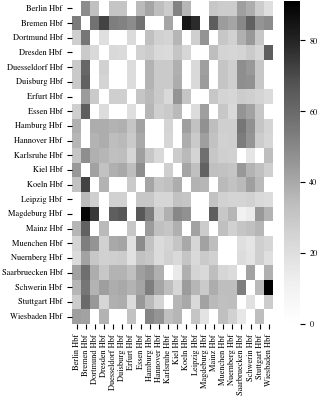

In [111]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1, usetex=False))

nan_color = 'lightgrey'


plt.figure()

#palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
data_sorted = sorted(set( list(filter(lambda x: not np.isnan(x), df_mean.values.flatten()))), reverse=True)
second_highest = data_sorted[1]
min_data = data_sorted[-1]

heatmap = sns.heatmap(df_mean, annot=False, cmap='Greys', mask=df_mean.isna(), cbar=True) # , vmin=0, vmax=second_highest

#cbar = heatmap.collections[0].colorbar
#cbar.set_ticks([cbar.vmin, cbar.vmax])


plt.savefig("plot_meanDelay_heatmap_greys.pdf", format="pdf")

plt.show()

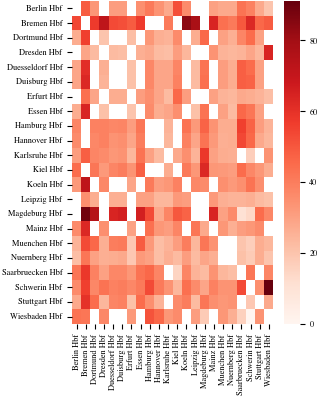

In [112]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=2, ncols=1, usetex=False))

#nan_color = 'lightgrey'


plt.figure()

#palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
data_sorted = sorted(set( list(filter(lambda x: not np.isnan(x), df_mean.values.flatten()))), reverse=True)
second_highest = data_sorted[1]
min_data = data_sorted[-1]

heatmap = sns.heatmap(df_mean, annot=False, cmap='Reds', mask=df_mean.isna(), cbar=True) # , vmin=0, vmax=second_highest

#cbar = heatmap.collections[0].colorbar
#cbar.set_ticks([cbar.vmin, cbar.vmax])


plt.savefig("plot_meanDelay_heatmap_reds.pdf", format="pdf")

plt.show()